# **Sumission Membuat Model Machine Learning dengan Data Time Series**

**Nama : Imam Sasongko Jati**

**Kelas : Belajar Pengembangan Machine Learning**

Menyiapkan dataset yang telah di unduh dari situs Kaggle [teks link](https://www.kaggle.com/fvcoppen/solarpanelspower), serta memilih kolom yang akan digunakan.

In [103]:
import pandas as pd
df = pd.read_csv('PV_Elec_Gas3.csv')
df

,date,Cumulative_solar_power,kWh electricity/day,Gas/day
0,26/10/2011,0.1,15.1,9.0
1,27/10/2011,10.2,7.4,9.2
2,28/10/2011,20.2,5.8,8.0
3,29/10/2011,29.6,4.9,6.6
4,30/10/2011,34.2,11.7,5.3
...,...,...,...,...
3299,6/11/2020,36445.0,16.0,11.0
3300,7/11/2020,36453.0,13.0,13.0
3301,8/11/2020,36461.0,12.0,11.0
3302,9/11/2020,36466.0,14.0,10.0


Mengecek apakah ada nilai yang kosong dari dataset menggunakan fungsi isnull().

In [104]:
df.isnull().sum()

date                      0
Cumulative_solar_power    0
kWh electricity/day       0
Gas/day                   0
dtype: int64

Memilih kolom 'date' dan 'Gas/day' dan memasukkanya pada dataframe baru karena yang akan dibuat adalah penggunaan gas tiap harinya.

In [105]:
dt = df[['date','Gas/day']]
dt

,date,Gas/day
0,26/10/2011,9.0
1,27/10/2011,9.2
2,28/10/2011,8.0
3,29/10/2011,6.6
4,30/10/2011,5.3
...,...,...
3299,6/11/2020,11.0
3300,7/11/2020,13.0
3301,8/11/2020,11.0
3302,9/11/2020,10.0


Import library yang akan digunakan

In [106]:
import numpy as np
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

Plot dates dan Gas/day

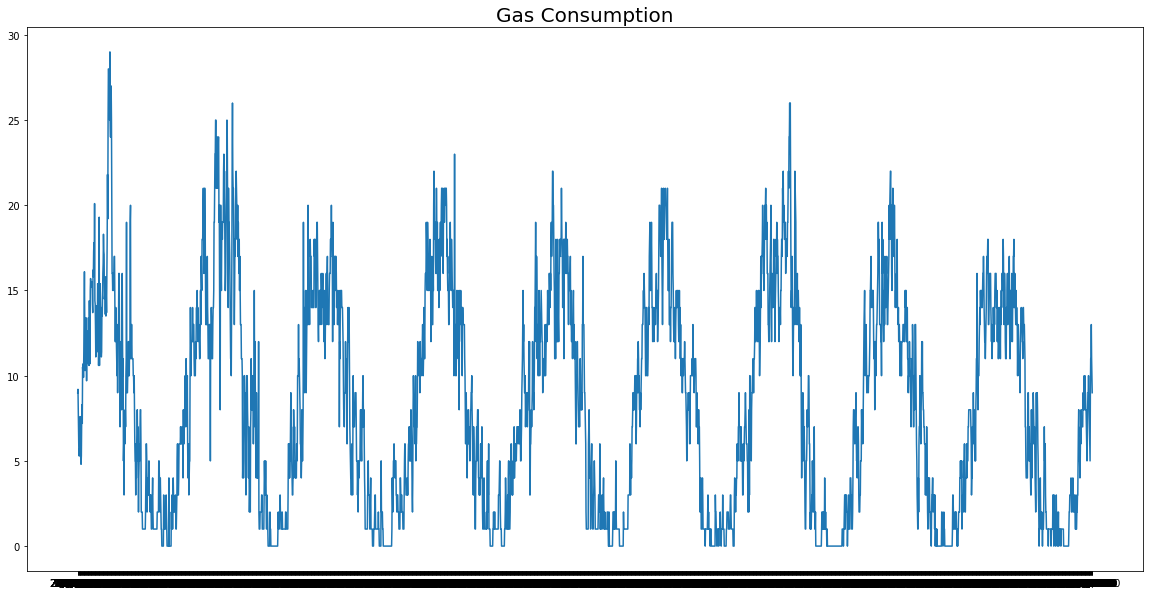

In [107]:
dates = dt['date'].values
gas  = dt['Gas/day'].values

dates = np.array(dates)
gas = np.array(gas) 
 
plt.figure(figsize=(20,10))
plt.plot(dates, gas)
plt.title('Gas Consumption',
          fontsize=20);

Split dataset dengan porsi data training (80%) dan data validasi (20%)

In [108]:
x_train, x_valid, y_train, y_valid = train_test_split(gas, dates, train_size=0.8, test_size = 0.2, shuffle = False )

In [109]:
print('Jumlah data train = ',len(x_train) )
print('Jumlah data validasi = ',len(x_valid) )
print('Jumlah total data = ',len(x_train)+len(x_valid))

Jumlah data train =  2643
Jumlah data validasi =  661
Jumlah total data =  3304


Merubah data agar dapat diterima model

In [110]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

Membuat arsitektur model dengan menggunakan dua buah layer LSTM serta model sequential

In [111]:
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=1000)
val_set = windowed_dataset(x_valid, window_size=60, batch_size=100, shuffle_buffer=1000)

model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

Pada optimizer, kita akan menggunakan parameter learning rate dan momentum, serta melakukan pelatihan pada model.

In [113]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

history = model.fit(train_set,
                    epochs=100,
                    validation_data=val_set)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
26/26 [==============================] - 8s 159ms/step - loss: 7.9537 - mae: 8.4126 - val_loss: 5.7599 - val_mae: 6.2095
Epoch 2/100
26/26 [==============================] - 3s 118ms/step - loss: 7.6568 - mae: 8.1208 - val_loss: 5.5145 - val_mae: 5.9694
Epoch 3/100
26/26 [==============================] - 3s 116ms/step - loss: 7.4095 - mae: 7.8739 - val_loss: 5.2953 - val_mae: 5.7487
Epoch 4/100
26/26 [==============================] - 3s 119ms/step - loss: 7.1709 - mae: 7.6303 - val_loss: 5.0781 - val_mae: 5.5257
Epoch 5/100
26/26 [==============================] - 3s 117ms/step - loss: 6.9262 - mae: 7.3811 - val_loss: 4.8513 - val_mae: 5.2955
Epoch 6/100
26/26 [==============================] - 3s 117ms/step - loss: 6.6614 - mae: 7.1157 - val_loss: 4.6029 - val_mae: 5.0456
Epoch 7/100
26/26 [==============================] - 3s 118ms/step - loss: 6.3660 - mae: 6.8278 - val_loss: 4.3335 - val_mae: 4.7852
Epoch 8/100
26/26 [==============================] - 3s 118ms/step - 

Plot loss dan akurasi pada saat training dan validation

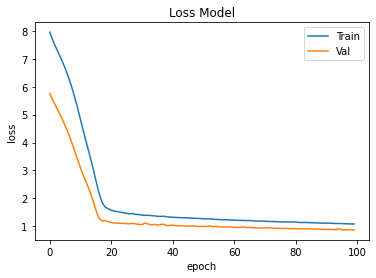

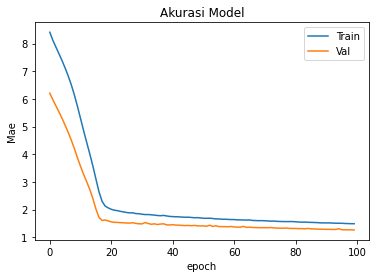

In [115]:
# Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Plot Accuracy
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Akurasi Model')
plt.ylabel('Mae')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()



Membuat fungsi callback yang digunakan untuk menghentikan proses latihan ketika nila MAE < 10%

In [116]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<10):
      print("\nNilai MAE telah dibawah 10% !")
      self.model.stop_training = True
callbacks = myCallback()

Pelatihan model dengan fitur callback

In [118]:
model.fit(train_set, 
          epochs=100, 
          validation_data=val_set, callbacks=[callbacks])

Epoch 1/100
26/26 [==============================] - 3s 121ms/step - loss: 1.0789 - mae: 1.4866 - val_loss: 0.8598 - val_mae: 1.2604

Nilai MAE telah dibawah 10% !
